In [227]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

In [229]:
img = cv2.imread('sweatpatch.JPG',0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

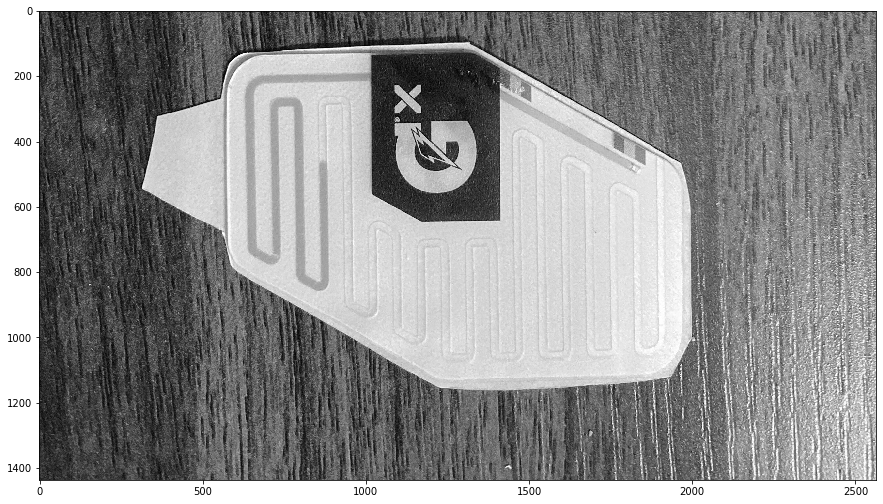

In [230]:
display(img)

In [190]:
cv2.imwrite('sweatpatchgray.jpg', img)

True

In [181]:
# Set the lower and upper threshold
med_val = np.median(img)

lower = int(max(0, .7*med_val))
upper = int(min(255, 1.3*med_val))
print("Lower: {}, Upper: {}".format(lower, upper))

Lower: 84, Upper: 156


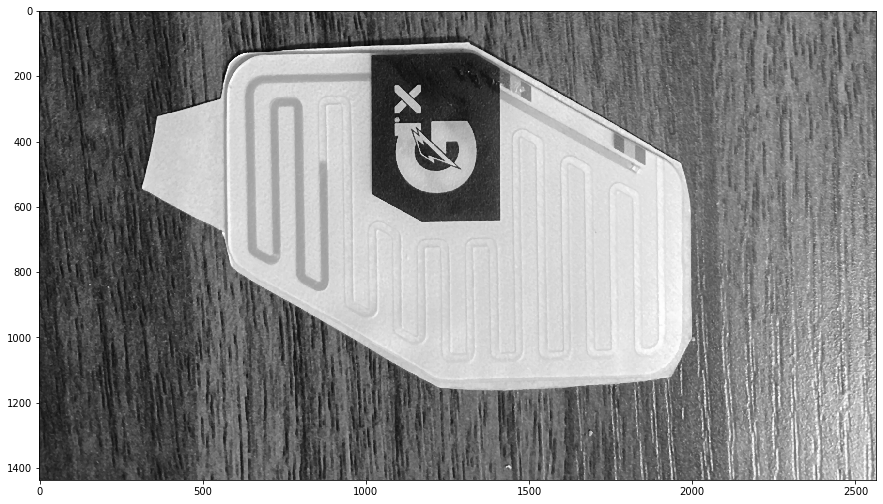

In [296]:
img_blur = cv2.medianBlur(img, 5)
display(img_blur)

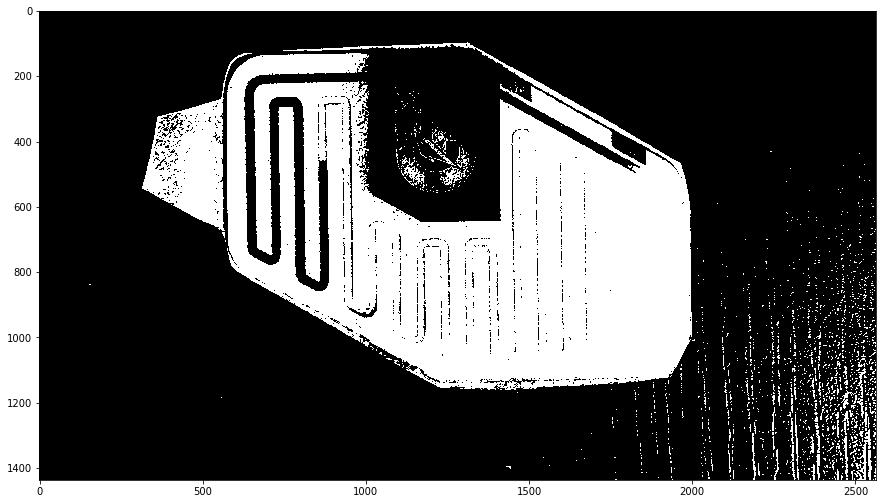

In [261]:
# Thresholding:
ret,thresh1 = cv2.threshold(img_blur,200,255,cv2.THRESH_BINARY)
display(thresh1)

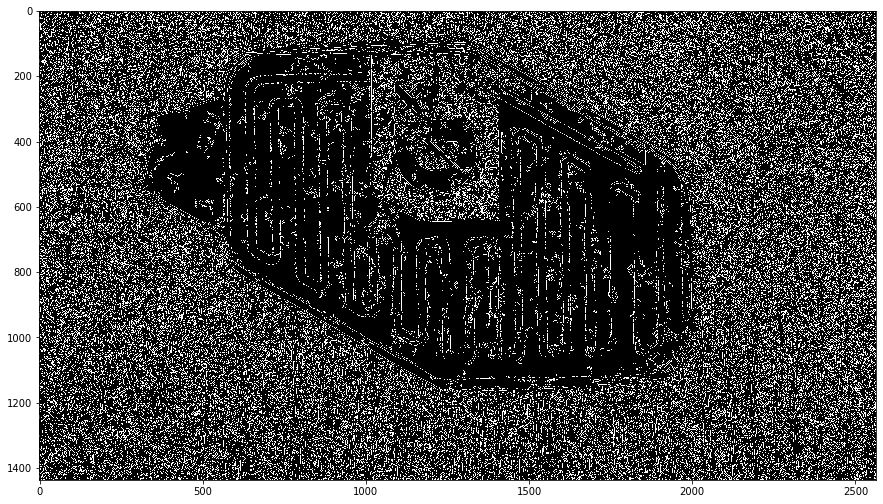

In [384]:
# Canny detection with different thresholds
edges_k5_2 = cv2.Canny(img_blur, threshold1 = 5, threshold2 = 60)
display(edges_k5_2, cmap = 'gray')

In [378]:
[upper,lower]

[156, 84]

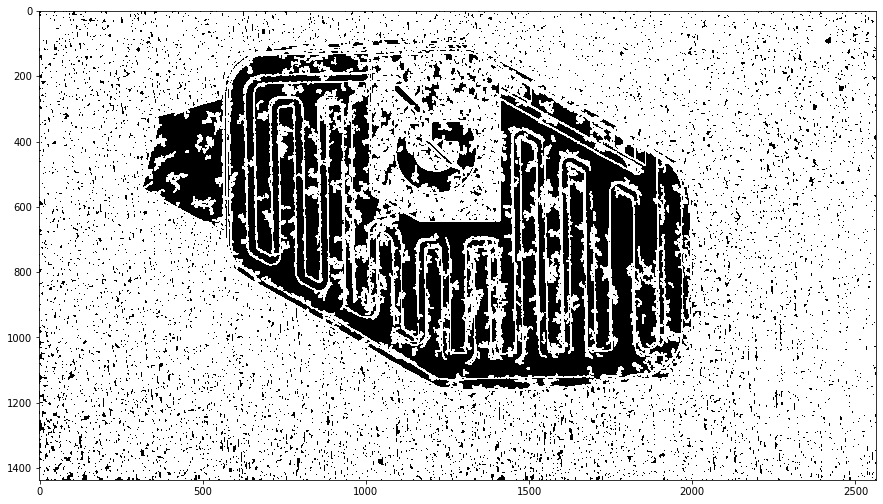

In [385]:
#dialate the image:
kernel = np.ones((3, 3), np.uint8)
img_dialate = cv2.dilate(edges_k5_2, kernel, iterations =2)
display(img_dialate, cmap = 'gray')

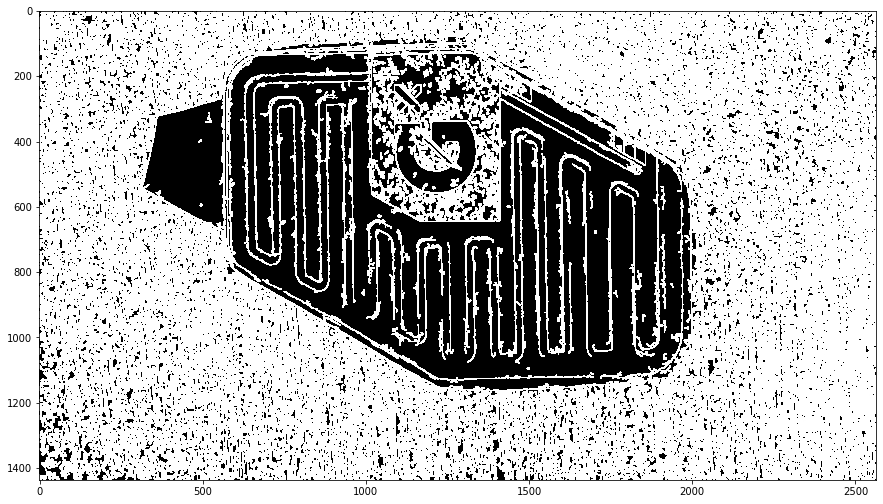

In [368]:
img1 = cv2.fastNlMeansDenoising(img_dialate,60.0, 7, 21);
display(img1, cmap = 'gray')